In [62]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
from sklearn.linear_model import LinearRegression

os.makedirs('../figures', exist_ok = True)

# Define the relative path to the 'src' folder
module_path = os.path.abspath(os.path.join('..', 'src'))

# Add the path to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

import analysis_utils as utils


In [63]:
df_od_age_group = pd.read_csv("../data/overdose_age_data_clean.csv")


In [64]:
df_od_age_group.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Sex,2,Male,2.1,2017,19,All ages,1.1,29.0,NaN,Male,All
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2006,8,All ages,1.1,11.5,NaN,All,All
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Sex,2,Male,2.1,2016,18,All ages,1.1,26.1,NaN,Male,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,1999,1,All ages,1.1,6.0,NaN,All,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,All


In [65]:
# filter for all drug overdose deaths
all_od_deaths = df_od_age_group[df_od_age_group["PANEL_NUM"] == 0]
# remove "All from age_group and sex since we want to look at distinct age_groups and distinct sex
all_od_deaths = all_od_deaths[(all_od_deaths["age_group"] == "All") & (all_od_deaths["sex"] == "All")]
all_od_deaths.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2006,8,All ages,1.1,11.5,NaN,All,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,1999,1,All ages,1.1,6.0,NaN,All,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,All
5,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,All,All
6,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,All,All


In [66]:
# make a prediction for 2018
# TODO: DELETE WHEN my_fit_trend_model IS IN ANALYSIS_UTILS.PY
d_pred = utils.fit_trend_model(all_od_deaths)
d_pred

{'slope': 0.7333834586466168,
 'intercept': -1460.55067669173,
 'r_squared': 0.9267291431065056,
 'predictions': array([ 5.48285714,  6.2162406 ,  6.94962406,  7.68300752,  8.41639098,
         9.14977444,  9.88315789, 10.61654135, 11.34992481, 12.08330827,
        12.81669173, 13.55007519, 14.28345865, 15.01684211, 15.75022556,
        16.48360902, 17.21699248, 17.95037594, 18.6837594 , 19.41714286]),
 'years': array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])}

In [35]:
# create a training set
train_od_deaths = all_od_deaths[all_od_deaths["YEAR"] < 2018]


In [36]:
#create a test set
test_od_deaths = all_od_deaths[all_od_deaths["YEAR"] == 2018]
test_od_deaths

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group
2750,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2018,20,All ages,1.1,20.6,NaN,All,All


In [37]:
# Make function to pass in train data and test data
def my_fit_trend_model(df_train, df_test):
    """
    Fit linear regression of death rate on year.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset with YEAR, ESTIMATE, PANEL, STUB_LABEL columns
    panel : str
        Drug overdose category to filter on
    demographic : str
        STUB_LABEL value to filter on

    Returns
    -------
    dict
        Dictionary with slope, intercept, r_squared, predictions, years
    """

    my_train = df_train.copy().sort_values("YEAR")
    my_test = df_test.copy().sort_values("YEAR")

    train_X = my_train["YEAR"].values.reshape(-1, 1)
    train_y = my_train["ESTIMATE"].values

    model = LinearRegression()
    model.fit(train_X, train_y)

    test_X = my_test["YEAR"].values.reshape(-1, 1)
    test_y = my_test["ESTIMATE"].values
    
    predictions = model.predict(test_X)
    r_squared = model.score(train_X, train_y)
    
    return {
        "slope": model.coef_[0],
        "intercept": model.intercept_,
        "r_squared": r_squared,
        "predictions": predictions,
        "years": my_test["YEAR"].values
    }

In [38]:
# make a prediction for 2018
my_d_pred = my_fit_trend_model(train_od_deaths, test_od_deaths)
my_d_pred

{'slope': 0.7126315789473683,
 'intercept': -1418.9431578947367,
 'r_squared': 0.9159557672451121,
 'predictions': array([19.14736842]),
 'years': array([2018])}

In [69]:
fit_slope = my_d_pred['slope']
fit_intercept = my_d_pred['intercept']
fit_R2 = my_d_pred['r_squared']

pred_estimate = my_d_pred["predictions"]
pred_year = my_d_pred["years"]
pred_PANEL = ["Predicted values" for i in pred_year]
predicted_df = pd.DataFrame({"YEAR" : pred_year, "ESTIMATE" : pred_estimate, "PANEL" : pred_PANEL})
predicted_df

,YEAR,ESTIMATE,PANEL
0,2018,19.147368,Predicted values


In [73]:
actual_df = all_od_deaths[all_od_deaths["YEAR"] == 2018].copy()
actual_df["PANEL"] = "Actual values"

✓ Saved: figures/drug_overdose_prediction.png


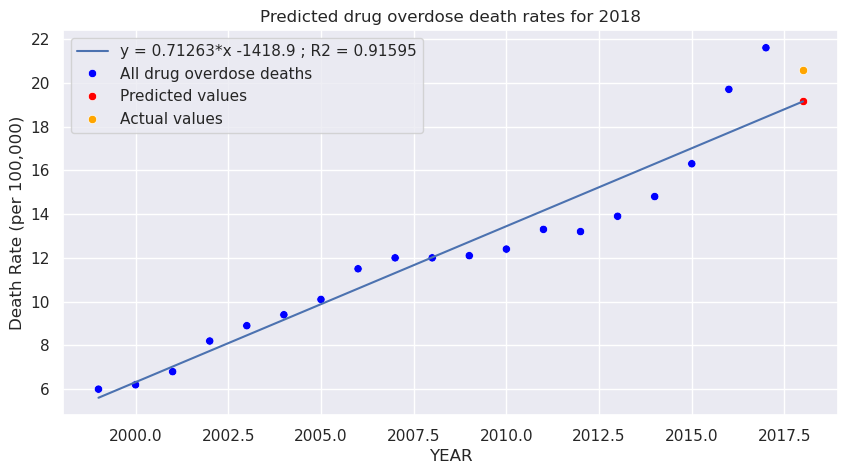

In [76]:
# plot year vs estimated deaths for each sex

X = [x for x in range(1999, 2018+1)]
Y = [fit_slope * x + fit_intercept for x in X]
fit_str = 'y = %3.7s*x %3.7s'%(fit_slope, fit_intercept) + ' ; ' + 'R2 = %3.7s'%(fit_R2)
FIT_PANEL = [fit_str for i in X]
fit_df = pd.DataFrame({"YEAR" : X, "ESTIMATE" : Y, "PANEL" : FIT_PANEL})


custom_palette = {
    'All drug overdose deaths': 'blue',     # Hex code
    'Predicted values': 'red',  # Hex code
    'Actual values': 'orange',  # Hex code
    fit_str : 'green'
}

fig, ax = plt.subplots(figsize=(10, 5))
#sns.set(color_codes=True)
ax = sns.lineplot(data=fit_df, x="YEAR", y="ESTIMATE", hue="PANEL")

sns.scatterplot(data = train_od_deaths, x='YEAR', y='ESTIMATE', hue='PANEL', palette=custom_palette)
sns.scatterplot(data = predicted_df, x='YEAR', y='ESTIMATE', hue='PANEL', palette=custom_palette)
sns.scatterplot(data = actual_df, x='YEAR', y='ESTIMATE', hue='PANEL', palette=custom_palette)
# Add a legend and show the plot
ax.set_ylabel('Death Rate (per 100,000)')



# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a dictionary to store unique labels and handles, which automatically removes duplicates
# Using dict.fromkeys preserves the insertion order in Python 3.7+
unique_labels_handles = dict(zip(labels, handles))

# Extract the unique handles and labels
unique_handles = unique_labels_handles.values()
unique_labels = unique_labels_handles.keys()

# Apply the unique handles and labels to the legend
ax.legend(unique_handles, unique_labels, title='')


ax.set_title('Predicted drug overdose death rates for 2018')

fig.savefig('../figures/drug_overdose_prediction.png', dpi=300, bbox_inches='tight')
print("✓ Saved: figures/drug_overdose_prediction.png")
